In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [2]:
# 2. Initialize the Taxi environment
RENDER_RGB = 'rgb_array'
RENDER_ANSI = 'ansi'

GAME_TAXI = 'Taxi-v3'

In [3]:
def create_env(pGame=GAME_TAXI, pRenderMode=RENDER_RGB, pPrint=False):
    if pPrint:
        print('[create_env] Creating environment...')
    try:
        env = gym.make(pGame, render_mode=pRenderMode)
        if pPrint:
            print('[create_env] Environment created successfully!')
        return env
    except Exception as e:
        print('[create_env] Error creating environment:', e)


In [4]:
# 3. Create a function to choose a random action
def get_policy( pState, pEnv=create_env()):
    return pEnv.action_space.sample()  # Random action for demonstration

In [5]:
# 4. Set up parameters
episodes = 1  # Number of episodes to run the agent
max_steps = 20  # Maximum steps per episode

In [12]:
## only used for rgb (graphical) rendering
def display_rgb(pEnv=create_env(), pPrintMultipleFrames=False):
    if pEnv.render_mode == RENDER_RGB:
        # Capture the frame for rendering
        frame = env.render()
        
        # Display the frame in Jupyter
        plt.imshow(frame)
        plt.axis('off')
        display(plt.gcf())
        if pPrintMultipleFrames:
            clear_output(wait=True)  # Clears the output for each frame
        time.sleep(0.3)  # Adjust for slower or faster playback
        


In [20]:
## transform passenger and destination into (row, col)
def passenger_to_coordinates(location):
    if location == 0: return (0, 0)
    elif location == 1: return (0, 4)
    elif location == 2: return (4, 0)
    elif location == 3: return (4, 3)
    elif location == 4: return (4, 4)
    elif location == 5: return (-1, -1)  # Special case for inside the taxi
    else: raise ValueError("Invalid location")

def destination_to_coordinates(destination):
    if destination == 0: return (0, 0)
    elif destination == 1: return (0, 4)
    elif destination == 2: return (4, 0)
    elif destination == 3: return (4, 4)
    else: raise ValueError("Invalid destination")

def decode_state(pState, pPrint=False):
    # Taxi position
    taxi_row = pState // (5 * 5 * 4)  # 5 rows * 5 cols * 4 destinations (passenger_loc is 5 or less)
    pState %= 5 * 5 * 4

    taxi_col = pState // (5 * 4)  # 5 cols * 4 destinations
    pState %= 5 * 4

    # Passenger location
    passenger_loc = pState // 4  # passenger location is 0-5
    if passenger_loc == 5:
        passenger_loc = -1  # -1 represents the passenger is in the taxi

    # Destination
    destination = pState % 4  # destination is 0-3

    if pPrint:
        print(f'taxi position: {(taxi_row, taxi_col)}')
        print(f'passenger: {passenger_to_coordinates(passenger_loc)}')
        print(f'destination: {destination_to_coordinates(destination)}')
        

    return taxi_row, taxi_col, passenger_loc, destination

In [21]:
# 5. Run the agent in the Taxi environment
def run_episodes(pEnv = create_env()
                 , pEpisodes = episodes
                 , pMaxSteps=max_steps
                 , pPrint=False
                 , pPrintMultipleFrames=False
                ):
    for episode in range(pEpisodes):
        state, info = pEnv.reset()  # Reset the environment for each episode
        done = False
        step = 0
        
        while not done and step < pMaxSteps:
            
            if pEnv.render_mode == RENDER_RGB:
                display_rgb(pPrintMultipleFrames=pPrintMultipleFrames)
            else:
                print(pEnv.render())
            
            ## PRINT before action
            if pPrint:   
                print('---------------')
                print('BEFORE action')
                decode_state(pState=state,  pPrint=True)

            # Choose an action using the function
            action = get_policy(pState=state, pEnv=pEnv)
            
            # Apply the action to the environment
            next_state, reward, terminated, truncated, info = pEnv.step(action)

            ## PRINT after action
            if pPrint:                
                print(f'current step: {step}')
                print(f'current state: {state}')                
                print(f'reward: {reward}')
                print(f'action: {action}')
                print(f'next_state: {next_state}')
                print(f'info: {info}')    

            
            # Update state and check termination
            state = next_state

            ## Cell positions
            if pPrint:   
                print('AFTER action')
                decode_state(pState=state, pPrint=True)
           
            done = terminated or truncated
            step += 1
    
        print(f"Episode {episode + 1} finished in {step} steps.\n")
   
    
    # 6. Close the environment when done
    pEnv.close()

[create_env] Creating environment...
[create_env] Environment created successfully!


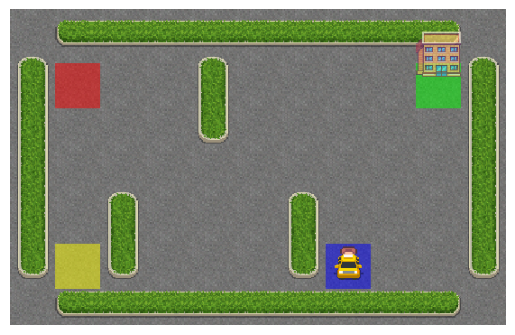

---------------
BEFORE action
taxi position: (4, 3)
passenger: (4, 3)
destination: (0, 4)
current step: 0
current state: 473
reward: -1
action: 1
next_state: 373
info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
AFTER action
taxi position: (3, 3)
passenger: (4, 3)
destination: (0, 4)


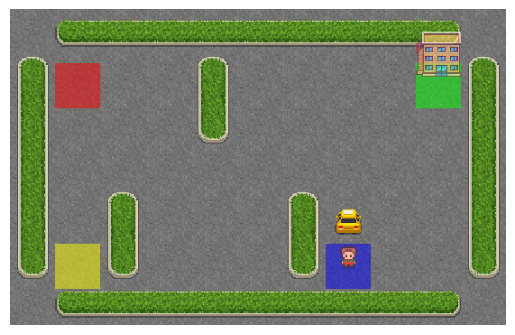

---------------
BEFORE action
taxi position: (3, 3)
passenger: (4, 3)
destination: (0, 4)
current step: 1
current state: 373
reward: -1
action: 1
next_state: 273
info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
AFTER action
taxi position: (2, 3)
passenger: (4, 3)
destination: (0, 4)


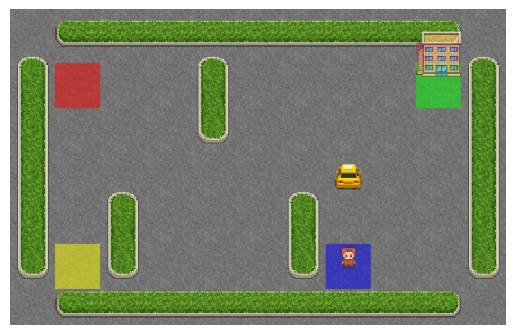

---------------
BEFORE action
taxi position: (2, 3)
passenger: (4, 3)
destination: (0, 4)
current step: 2
current state: 273
reward: -10
action: 5
next_state: 273
info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
AFTER action
taxi position: (2, 3)
passenger: (4, 3)
destination: (0, 4)
Episode 1 finished in 3 steps.



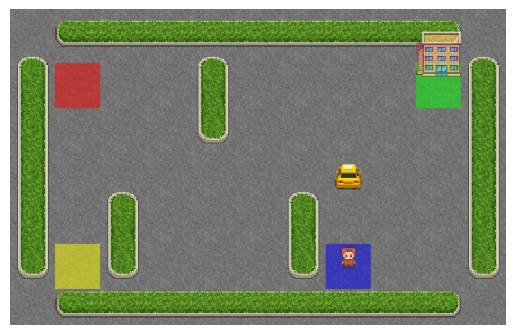

In [22]:
## RGB
env = create_env(pRenderMode = RENDER_RGB,  pPrint=True)
run_episodes(pEnv=env, pEpisodes=1, pMaxSteps=3, pPrint=True)

In [80]:
## text
env = create_env(pRenderMode = RENDER_ANSI,  pPrint=True)

[create_env] Creating environment...
[create_env] Environment created successfully!


In [91]:
env.action_space

Discrete(6)

In [92]:
env.observation_space

Discrete(500)

In [125]:
## text
env = create_env(pRenderMode = RENDER_ANSI,  pPrint=True)
run_episodes(pEnv=env, pEpisodes=1, pMaxSteps=2, pPrint=True)

[create_env] Creating environment...
[create_env] Environment created successfully!
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


---------------
BEFORE action
Taxi Position: (3, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
current step: 0
current state: 382
reward: -10
action: 4
next_state: 382
info: {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}
AFTER action
Taxi Position: (3, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

---------------
BEFORE action
Taxi Position: (3, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
current step: 1
current state: 382
reward: -1
action: 1
next_state: 282
info: {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}
AFTER action
Taxi Position: (2, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
Episode 1 finished in 2 steps.

